In [1]:
# Cargamos la librerías
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

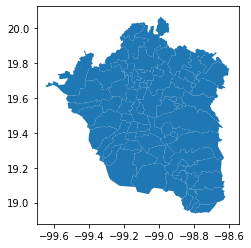

In [2]:
# Shape de municipios de la zona metropolitana de valle de México
municipios = gpd.read_file('/home/milo/PCIC/Maestría/2doSemestre/redes_sis_complejos/proyecto/github/datos/shape/muni_metro')
# Visualizamos
municipios.plot()

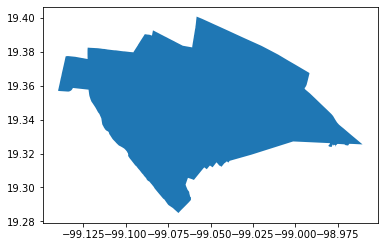

In [3]:
municipios.loc[municipios.NOM_MUN=="Iztapalapa"].plot()

In [4]:
iztapalapa=municipios.loc[10,"geometry"]
tlalpan= municipios.loc[66,"geometry"]
iztacalco=municipios.loc[8,"geometry"]

iztapalapa.touches(tlalpan),iztapalapa.touches(iztacalco)

(False, True)

In [5]:
municipios['geometry'].touches(iztapalapa)

0     False
1     False
2     False
3     False
4     False
      ...  
71    False
72    False
73     True
74     True
75    False
Length: 76, dtype: bool

In [6]:
municipios[municipios['geometry'].touches(iztapalapa)]

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,LLAVE,geometry
8,09,006,Iztacalco,340,340,341,09006,"POLYGON ((-99.05579 19.42214, -99.05584 19.421..."
39,15,058,Nezahualcóyotl,745,745,746,15058,"POLYGON ((-98.99103 19.42463, -98.99067 19.424..."
45,15,070,La Paz,751,751,752,15070,"POLYGON ((-98.93892 19.38648, -98.93789 19.386..."
63,15,122,Valle de Chalco Solidaridad,769,769,770,15122,"POLYGON ((-98.95303 19.33463, -98.95237 19.333..."
67,09,013,Xochimilco,2449,2449,2450,09013,"POLYGON ((-99.09880 19.32045, -99.09870 19.319..."
69,09,014,Benito Juárez,2451,2451,2452,09014,"POLYGON ((-99.13659 19.40281, -99.13679 19.401..."
73,09,003,Coyoacán,2455,2455,2456,09003,"POLYGON ((-99.13984 19.35692, -99.13923 19.356..."
74,09,011,Tláhuac,2456,2456,2457,09011,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."


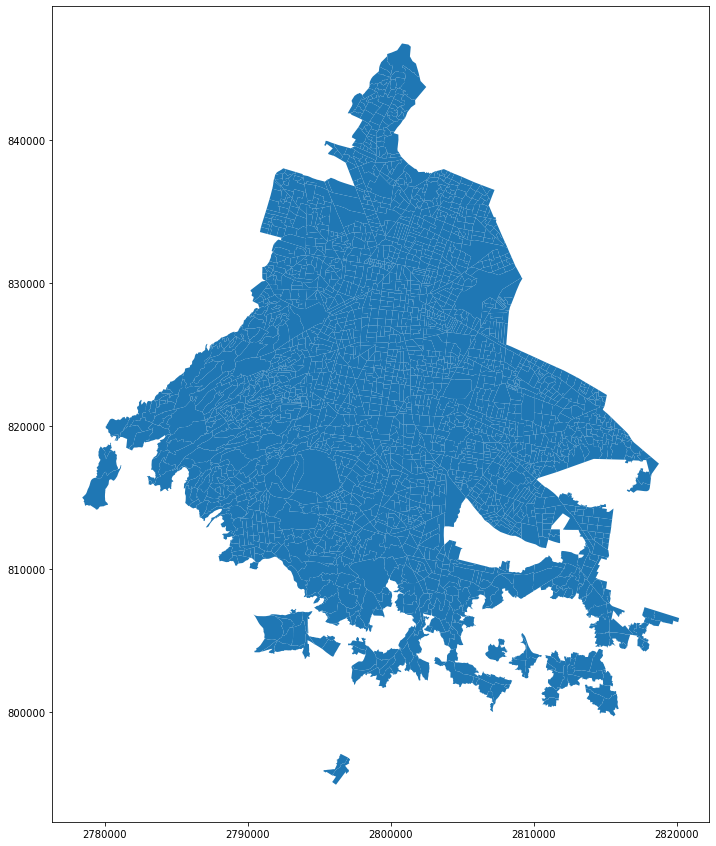

In [7]:
### Cargamos shape de agebs
agebs_cdmx = gpd.read_file('/home/milo/Datos/agebs/conjunto de datos/09a')
# Visualizamos
agebs_cdmx.plot(figsize=(15, 15))

In [8]:
def layer2net(capa):
    almacena = {}
    
    for geometria in range(capa.shape[0]):
        if (geometria % 500)==0:
            print(geometria)
        cvegeo=capa.loc[geometria,"CVEGEO"]
        vecinos = np.array(capa['geometry'].touches(capa.loc[geometria,"geometry"]),dtype=int)
        almacena[cvegeo]= vecinos
    
    return almacena

In [9]:
adyacencia_dic=layer2net(agebs_cdmx)

0
500
1000
1500
2000


In [10]:
adyacencia_dic

{'0900200010148': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010190': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010932': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010237': array([1, 0, 0, ..., 0, 0, 0]),
 '0900200010595': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010608': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010612': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010627': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011038': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011076': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011080': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011165': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011042': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010665': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010010': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010025': array([0, 0, 0, ..., 0, 0, 0]),
 '090020001003A': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200011150': array([0, 0, 1, ..., 0, 0, 0]),
 '0900200011023': array([0, 0, 0, ..., 0, 0, 0]),
 '0900200010684': array([0, 0, 0, ..., 0, 0, 0]),


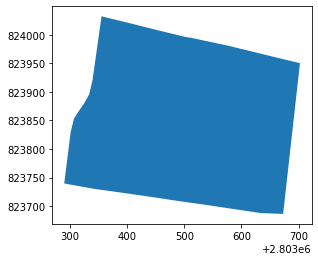

In [12]:
agebs_cdmx.loc[agebs_cdmx.CVEGEO=='0900600010842'].plot()


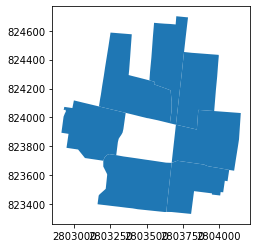

In [13]:

agebs_cdmx[np.array(adyacencia_dic['0900600010842'].tolist(),dtype=bool)].plot()

In [14]:
adyacencia_mat = np.array([adyacencia_dic[i] for i in adyacencia_dic.keys()])
adyacencia_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

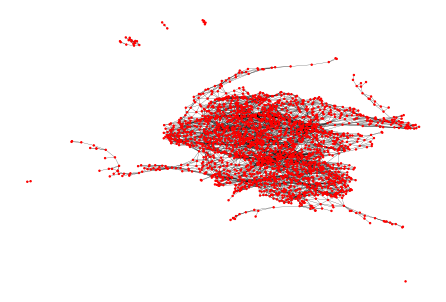

In [15]:
import networkx as nx
G = nx.from_numpy_matrix(adyacencia_mat)
nx.draw(G,node_size=[2]*adyacencia_mat.shape[0],width=[0.2]*adyacencia_mat.shape[0],with_labels=False, node_color="r")
plt.savefig("graph.pdf")


In [21]:
### Cargamos datos del censo a nivel ageb
censo_ageb = pd.read_csv("/home/milo/Datos/Censo_2010/resageburb_09_2010_csv/resultados_ageb_urbana_09_cpv2010/conjunto_de_datos/resultados_ageb_urbana_09_cpv2010.csv")


In [17]:
censo_ageb["CVEGEO"]= censo_ageb["entidad"].apply("{0:0=2d}".format)+censo_ageb["mun"].apply("{0:0=3d}".format)+censo_ageb["loc"].apply("{0:0=4d}".format)+censo_ageb["ageb"]

censo_ageb=censo_ageb.groupby(by=["CVEGEO"], dropna=False).sum()
agebs_cdmx=pd.merge(left=agebs_cdmx, right=censo_ageb, how='left', left_on='CVEGEO', right_on='CVEGEO')
agebs_cdmx

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,entidad,mun,loc,mza,pobtot,vivtot
0,0900200010148,09,002,0001,0148,"POLYGON ((2792293.083 836437.284, 2792318.429 ...",315.0,70.0,35.0,648.0,5290.0,1588.0
1,0900200010190,09,002,0001,0190,"POLYGON ((2794091.189 836328.506, 2794101.232 ...",333.0,74.0,37.0,713.0,15096.0,4864.0
2,0900200010932,09,002,0001,0932,"POLYGON ((2793978.122 837524.625, 2794007.726 ...",162.0,36.0,18.0,153.0,760.0,248.0
3,0900200010237,09,002,0001,0237,"POLYGON ((2792174.662 835662.092, 2792162.010 ...",252.0,56.0,28.0,394.0,12710.0,3774.0
4,0900200010595,09,002,0001,0595,"POLYGON ((2791668.520 834498.933, 2791701.261 ...",261.0,58.0,29.0,406.0,9274.0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0901700010988,09,017,0001,0988,"POLYGON ((2803507.137 827804.372, 2803512.087 ...",153.0,289.0,17.0,157.0,2328.0,860.0
2427,0901700010969,09,017,0001,0969,"POLYGON ((2802983.014 827913.377, 2803008.109 ...",99.0,187.0,11.0,64.0,1058.0,350.0
2428,0901700010973,09,017,0001,0973,"POLYGON ((2803357.790 827731.478, 2803326.404 ...",117.0,221.0,13.0,94.0,2080.0,726.0
2429,0901700011007,09,017,0001,1007,"POLYGON ((2804071.120 827758.783, 2804065.741 ...",72.0,136.0,8.0,28.0,4092.0,1434.0


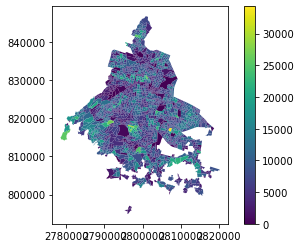

In [18]:
agebs_cdmx.plot(column='pobtot', legend=True)

In [19]:
agebs_cdmx['pobtot'].describe()

count     2430.000000
mean      7251.249383
std       4506.854665
min          0.000000
25%       4031.000000
50%       6577.000000
75%       9750.500000
max      34304.000000
Name: pobtot, dtype: float64

In [30]:
censo_ageb["CVEGEO"]= censo_ageb["entidad"].apply("{0:0=2d}".format)+censo_ageb["mun"].apply("{0:0=3d}".format)+censo_ageb["loc"].apply("{0:0=4d}".format)+censo_ageb["ageb"]
censo_ageb.groupby("CVEGEO", dropna=False, as_index=False).sum()

,CVEGEO,entidad,mun,loc,mza,pobtot,vivtot
0,0900000000000,9,0,0,0,8851080,2745180
1,0900200000000,9,2,0,0,414711,132135
2,0900200010000,9,2,1,0,414711,132135
3,0900200010010,243,54,27,404,6848,1758
4,0900200010025,414,92,46,1104,11824,3418
...,...,...,...,...,...,...,...
2477,0901700011488,297,561,33,528,2514,632
2478,0901700011492,288,544,32,522,2026,560
2479,0901700011505,405,765,45,990,5482,2014
2480,090170001151A,378,714,42,861,4704,1664


In [36]:
censo_ageb.dtypes

entidad       int64
nom_ent      object
mun           int64
nom_mun      object
loc           int64
              ...  
vph_pc       object
vph_telef    object
vph_cel      object
vph_inter    object
CVEGEO       object
Length: 199, dtype: object